In [0]:
#@title
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Definieer wat waardes voor je k's
kdeg = 0.5       #I->Id
kgsh = 0     #I + RHS -> I-SR
kdisr = 0    #I-SR -> I-SRd


# Definieer de concentraties op T=0 (in eerste instantie: voor inhibitie of substraat)

Id0 = 0
ISR0 = 0
ISRd0 = 0


#Definieer constanten
Is = [100*10**-6, 0*10**-9] #lijst van concentraties
RHS0 = 0*10**-3
dt = 0.01 #Dit is hoe groot je simulatie tijdstappen zijn

tframe = 1 #save a frame every 60 s
tincub =  0 #incubate for 1800 s
tsub =  600 # Run with substrate for 1800 s

In [0]:
all_plots = []


for Ip in Is: # Loop over all I's
  I0 = Ip
  concentraties = np.array([I0, Id0, ISR0, ISRd0], dtype=np.double) #matrix van concentraties
  # Voor toevoeging van RHS

  RHS=0
                          # [             I,       Id,    ISR,   ISRd]
  tijdevolutie0 = np.array([[-kdeg-kgsh*RHS,        0,      0,      0],  #I
                            [          kdeg,        0,      0,      0],  #Id
                            [      kgsh*RHS,        0, -kdisr,      0],  #ISR
                            [             0,        0,  kdisr,      0]])  #ISRd

  #verandering in E   = [E]*(-k3*I-k1*L) + [EL]*(k2)       + [EL*]*(0) + [EI]*(k4)     + [EI*]*(0)
  #verandering in EL  = [E]*(k1*L)       + [EL]*(-k2-kcat) + [EL*]*(0) + [EI]*(0)      + [EI*]*(0)
  #verandering in EL* = [E]*(0)          + [EL]*(kcat)     + [EL*]*(0) + [EI]*(0)      + [EI*]*(0)
  #verandering in EI  = [E]*(k3*I)       + [EL]*(0)        + [EL*]*(0) + [EI]*(-k4-k5) + [EI*]*(k6)
  #verandering in EI* = [E]*(0)          + [EL]*(0)        + [EL*]*(0) + [EI]*(k5)     + [EI*]*(-k6)


  #Na toevoeging van S
  RHS = RHS0
  tijdevolutie1 =  np.array([[-kdeg-kgsh*RHS,        0,      0,      0],  #I
                            [           kdeg,        0,      0,      0],  #Id
                            [       kgsh*RHS,        0, -kdisr,      0],  #ISR
                            [              0,        0,  kdisr,      0]])  #ISRd
  # Maak een lijst van kopien van de concentraties
  plot = [concentraties.copy()]

  tijdconc = concentraties.copy()
  t = 0
  # Voor toevoging van S (tincub/dt stappen = 30min)
  for i in range(int(tincub/dt)):
      t+= 1
      tijdconc += np.dot(tijdevolutie0*dt, tijdconc) # Doe 1 dt tijdstap
      if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")
      
      if t % int(tframe/dt)==0:
          plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst

  # Na toevoeging van S (tsub/dt stappen)
  for i in range(int(tsub/dt)):
      t += 1
      tijdconc += np.dot(tijdevolutie1*dt, tijdconc) #Doe 1 dt tijdstap
      if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

      if t % int(tframe/dt)==0:
          plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst

  all_plots.append(plot)

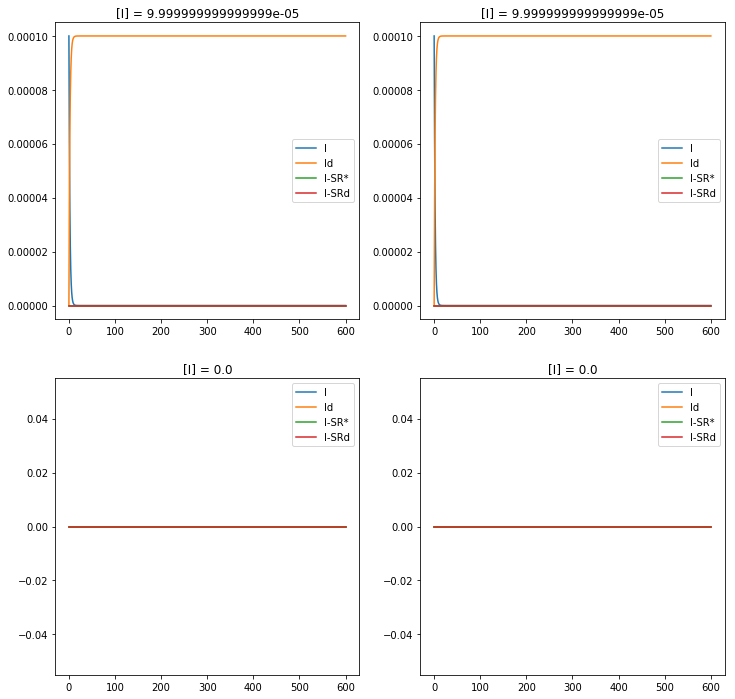

In [39]:
 # [           I,       Id,    ISR,   ISRd]
# This will make all the plots and dataframes
dataframes = []
fig, axes = plt.subplots(len(all_plots), 2, figsize=(12,len(all_plots)*6))
for n, plot in enumerate(all_plots):
  # Splits de lijst van figuren in E, EL, EL*, EI en EI*
  Eplot = [] 
  ESplot = []
  Pplot = []
  EIplot = []

  for frame in plot:
    Eplot.append(frame[0])
    ESplot.append(frame[1])
    Pplot.append(frame[2])
    EIplot.append(frame[3])
   
    
   # Plot de figuren
  labels = ('I', 'Id', "I-SR*", "I-SRd")
  for i,y in enumerate((Eplot, ESplot, Pplot, EIplot)):
    axes[n,0].plot(y, label=labels[i])
  axes[n,0].legend()
  for i,y in enumerate((Eplot, ESplot, Pplot, EIplot)):
      axes[n,1].plot(y, label=labels[i])
  axes[n,1].legend()
  axes[n,0].set_title("[I] = {}".format(str(Is[n])))
  axes[n,1].set_title("[I] = {}".format(str(Is[n])))
  
  df = pd.DataFrame(data={'I':Eplot,  "Id":ESplot, "ISRd":EIplot, "ISR":Pplot})
  dataframes.append(df)
df = pd.concat(dataframes, keys=[I for I in Is], axis=1) # Combine all the dataframes

In [40]:
df

0.0001                     0.0000               
                 I        Id ISRd  ISR      I   Id ISRd  ISR
0     1.000000e-04  0.000000  0.0  0.0    0.0  0.0  0.0  0.0
1     6.057704e-05  0.000039  0.0  0.0    0.0  0.0  0.0  0.0
2     3.669578e-05  0.000063  0.0  0.0    0.0  0.0  0.0  0.0
3     2.222922e-05  0.000078  0.0  0.0    0.0  0.0  0.0  0.0
4     1.346580e-05  0.000087  0.0  0.0    0.0  0.0  0.0  0.0
5     8.157186e-06  0.000092  0.0  0.0    0.0  0.0  0.0  0.0
6     4.941382e-06  0.000095  0.0  0.0    0.0  0.0  0.0  0.0
7     2.993343e-06  0.000097  0.0  0.0    0.0  0.0  0.0  0.0
8     1.813279e-06  0.000098  0.0  0.0    0.0  0.0  0.0  0.0
9     1.098431e-06  0.000099  0.0  0.0    0.0  0.0  0.0  0.0
10    6.653969e-07  0.000099  0.0  0.0    0.0  0.0  0.0  0.0
11    4.030777e-07  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
12    2.441726e-07  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
13    1.479125e-07  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
14    8.960104e-08  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
15    5.427766e-08  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
16    3.287980e-08  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
17    1.991761e-08  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
18    1.206550e-08  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
19    7.308924e-09  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
20    4.427530e-09  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
21    2.682067e-09  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
22    1.624717e-09  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
23    9.842053e-10  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
24    5.962025e-10  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
25    3.611618e-10  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
26    2.187812e-10  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
27    1.325312e-10  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
28    8.028346e-11  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
29    4.863335e-11  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
..             ...       ...  ...  ...    ...  ...  ...  ...
571  4.987818e-129  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
572  3.021473e-129  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
573  1.830319e-129  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
574  1.108753e-129  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
575  6.716498e-130  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
576  4.068656e-130  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
577  2.464671e-130  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
578  1.493025e-130  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
579  9.044305e-131  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
580  5.478772e-131  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
581  3.318878e-131  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
582  2.010478e-131  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
583  1.217888e-131  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
584  7.377608e-132  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
585  4.469137e-132  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
586  2.707271e-132  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
587  1.639985e-132  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
588  9.934542e-133  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
589  6.018052e-133  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
590  3.645558e-133  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
591  2.208371e-133  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
592  1.337766e-133  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
593  8.103791e-134  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
594  4.909037e-134  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
595  2.973749e-134  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
596  1.801409e-134  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
597  1.091241e-134  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
598  6.610413e-135  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
599  4.004393e-135  0.000100  0.0  0.0    0.0  0.0  0.0  0.0
600  2.425743e-135  0.000100  0.0  0.0    0.0  0.0  0.0  0.0

[601 rows x 8 columns]

In [41]:
df.iloc[30]

0.0001  I       2.946064e-11
        Id      9.999997e-05
        ISRd    0.000000e+00
        ISR     0.000000e+00
0.0000  I       0.000000e+00
        Id      0.000000e+00
        ISRd    0.000000e+00
        ISR     0.000000e+00
Name: 30, dtype: float64

In [42]:
print(df.to_csv())

,9.999999999999999e-05,9.999999999999999e-05,9.999999999999999e-05,9.999999999999999e-05,0.0,0.0,0.0,0.0
,I,Id,ISRd,ISR,I,Id,ISRd,ISR
0,9.999999999999999e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0577043649072834e-05,3.94229563509272e-05,0.0,0.0,0.0,0.0,0.0,0.0
2,3.669578217261675e-05,6.330421782738328e-05,0.0,0.0,0.0,0.0,0.0,0.0
3,2.2229219984074732e-05,7.777078001592531e-05,0.0,0.0,0.0,0.0,0.0,0.0
4,1.3465804292601364e-05,8.653419570739859e-05,0.0,0.0,0.0,0.0,0.0,0.0
5,8.157186144027857e-06,9.184281385597211e-05,0.0,0.0,0.0,0.0,0.0,0.0
6,4.9413822110038775e-06,9.505861778899613e-05,0.0,0.0,0.0,0.0,0.0,0.0
7,2.993343258827339e-06,9.700665674117262e-05,0.0,0.0,0.0,0.0,0.0,0.0
8,1.8132788524664143e-06,9.818672114753355e-05,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0984307219379862e-06,9.890156927806201e-05,0.0,0.0,0.0,0.0,0.0,0.0
10,6.653968578831995e-07,9.933460314211678e-05,0.0,0.0,0.0,0.0,0.0,0.0
11,4.030777450394649e-07,9.959692225496052e-05,0.0,0.0,0.0,0.0,0.0,0.0
12,2.4417258155225493e-07,9.975582741